# CHN算法XCO2ano重置
* 当前已有数据：每日高质量数据点集合csv_good
* 首先需要求出每日中国区域中值

In [1]:
inPath = "H:\\XCO2\\OCO2_L2_Lite_FP_11.1r\\csv_good\\"
import os

filenames = os.listdir(inPath)
filenames

['oco2_LtCO2_140906.csv',
 'oco2_LtCO2_140907.csv',
 'oco2_LtCO2_140908.csv',
 'oco2_LtCO2_140909.csv',
 'oco2_LtCO2_140910.csv',
 'oco2_LtCO2_140911.csv',
 'oco2_LtCO2_140912.csv',
 'oco2_LtCO2_140913.csv',
 'oco2_LtCO2_140914.csv',
 'oco2_LtCO2_140915.csv',
 'oco2_LtCO2_140916.csv',
 'oco2_LtCO2_140917.csv',
 'oco2_LtCO2_140918.csv',
 'oco2_LtCO2_140919.csv',
 'oco2_LtCO2_140920.csv',
 'oco2_LtCO2_140921.csv',
 'oco2_LtCO2_140922.csv',
 'oco2_LtCO2_140923.csv',
 'oco2_LtCO2_140924.csv',
 'oco2_LtCO2_140925.csv',
 'oco2_LtCO2_140926.csv',
 'oco2_LtCO2_141002.csv',
 'oco2_LtCO2_141003.csv',
 'oco2_LtCO2_141004.csv',
 'oco2_LtCO2_141005.csv',
 'oco2_LtCO2_141006.csv',
 'oco2_LtCO2_141007.csv',
 'oco2_LtCO2_141008.csv',
 'oco2_LtCO2_141009.csv',
 'oco2_LtCO2_141010.csv',
 'oco2_LtCO2_141011.csv',
 'oco2_LtCO2_141012.csv',
 'oco2_LtCO2_141013.csv',
 'oco2_LtCO2_141014.csv',
 'oco2_LtCO2_141015.csv',
 'oco2_LtCO2_141016.csv',
 'oco2_LtCO2_141017.csv',
 'oco2_LtCO2_141018.csv',
 'oco2_LtCO2

<AxesSubplot:>

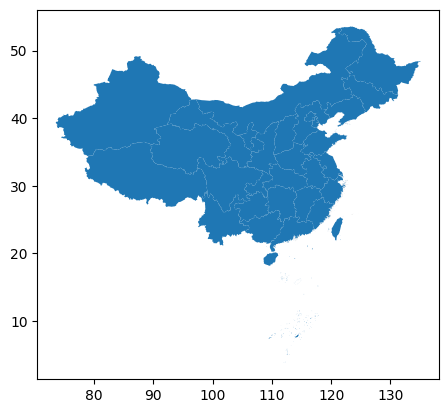

In [2]:
import geopandas as gpd

chinaShp = gpd.read_file("H:\\Region\\全国shp\\最新2021年全国行政区划\\省.shp")
chinaShp.plot()

In [5]:
import numpy as np
import pandas as pd
from shapely.geometry import Point
outPath = "H:\\XCO2\\OCO2_L2_Lite_FP_11.1r\\csv_china_anomaly\\"
left, right, down, up = 70.0, 140.0, 15.0, 60.0  # 定义一个经纬度框，异常值只算框内数据

for filename in filenames:
    reserved_points = []
    filePath = inPath + filename
    data = pd.read_csv(filePath).to_numpy()
    points = [Point(lon, lat) for lon, lat, _ in data]
    points_gdf = gpd.GeoDataFrame(geometry=points, crs=chinaShp.crs)
    points_within_china = gpd.sjoin(points_gdf, chinaShp, predicate='within')
    for idx in points_within_china.index:
        reserved_points.append(data[idx])
    anomaly = np.array(reserved_points)
    data_box = data[np.logical_and(left < data[:, 0], data[:, 0] < right) &
                    np.logical_and(down < data[:, 1], data[:, 1] < up)]  # 仅保留框内数据
    if anomaly.shape[0] < 100:
        print(f"{filename} failed.")
        continue  # 境内样本点小于100直接跳过
    median = np.median(anomaly[:, 2])
    data_box[:, 2] -= median  # 求出每个样本点对应异常值
    df_ano = pd.DataFrame(data_box, columns=["longitude", "latitude", "xco2_anomaly"])
    df_ano.to_csv(outPath + filename, index=False)
    print(f"{filename} succeed.")

oco2_LtCO2_140906.csv succeed.
oco2_LtCO2_140907.csv succeed.
oco2_LtCO2_140908.csv succeed.
oco2_LtCO2_140909.csv succeed.
oco2_LtCO2_140910.csv succeed.
oco2_LtCO2_140911.csv succeed.
oco2_LtCO2_140912.csv succeed.
oco2_LtCO2_140913.csv succeed.
oco2_LtCO2_140914.csv succeed.
oco2_LtCO2_140915.csv succeed.
oco2_LtCO2_140916.csv succeed.
oco2_LtCO2_140917.csv succeed.
oco2_LtCO2_140918.csv succeed.
oco2_LtCO2_140919.csv succeed.
oco2_LtCO2_140920.csv succeed.
oco2_LtCO2_140921.csv succeed.
oco2_LtCO2_140922.csv succeed.
oco2_LtCO2_140923.csv succeed.
oco2_LtCO2_140924.csv succeed.
oco2_LtCO2_140925.csv succeed.
oco2_LtCO2_140926.csv succeed.
oco2_LtCO2_141002.csv succeed.
oco2_LtCO2_141003.csv succeed.
oco2_LtCO2_141004.csv succeed.
oco2_LtCO2_141005.csv succeed.
oco2_LtCO2_141006.csv succeed.
oco2_LtCO2_141007.csv succeed.
oco2_LtCO2_141008.csv succeed.
oco2_LtCO2_141009.csv succeed.
oco2_LtCO2_141010.csv succeed.
oco2_LtCO2_141011.csv succeed.
oco2_LtCO2_141012.csv succeed.
oco2_LtC

# 处理完成，开始进行年尺度格网聚合